#### Import des librairies

In [12]:
import pandas as pd

#### Chargement des données

In [42]:
df_train = pd.read_csv('./data/sentiment-train-mini.csv',sep=',',header=None,names=['label','text'],keep_default_na=False)

In [43]:
df_train.text.head()

0                          Pas au travail aujourd'hui.
1                    Aucun cas du monday w / around !!
2    - Mes amis de la ville natale plus brillants s...
3    C'est cool bubs x .. soupir .. j'ai essayé si ...
4    Je ne serai pas à la maison pour le regarder! ...
Name: text, dtype: object

#### Création des vecteurs One Hot

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
# df_train = df_train.dropna(subset=['text'])

#print(df_train['text'].isnull().sum())  # Affiche le nombre de valeurs NaN dans la colonne 'text'
# Afficher les lignes contenant des NaN dans la colonne 'text'

lignes_nan = df_train[df_train['text'].isnull()]
print(lignes_nan)


Empty DataFrame
Columns: [label, text]
Index: []


In [46]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_train.text)

In [47]:
# nombre de mots distin: 
print("nombre de mots distin:",len(count_vect.get_feature_names_out()))
X_train_counts.shape

nombre de mots distin: 9718


(5000, 9718)

In [48]:
count_vect = CountVectorizer(max_features=5000)
X_train_counts = count_vect.fit_transform(df_train.text)

In [49]:
X_train_counts.shape

(5000, 5000)

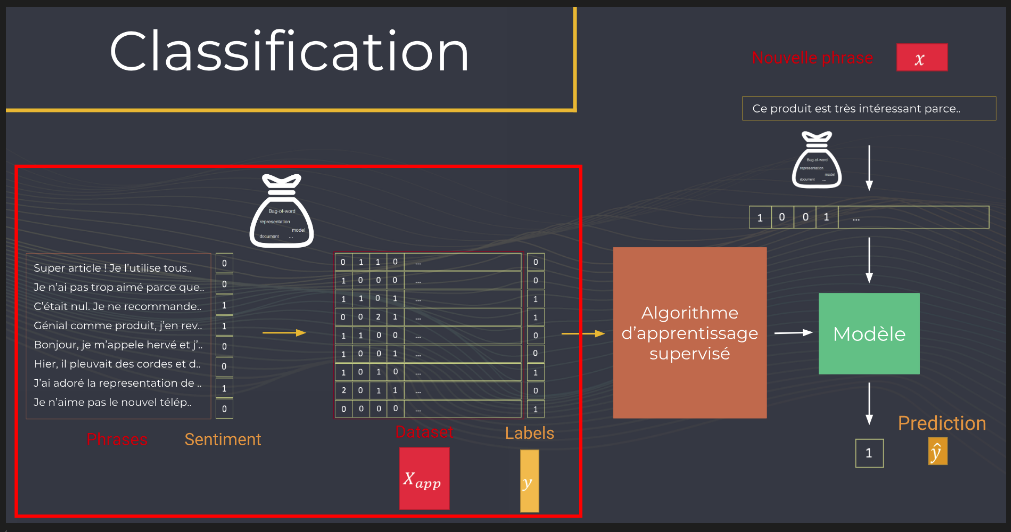

In [50]:
from IPython.display import Image
Image("./Images/Etape1.png", width=1000)

#### Définition du modèle

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

#### Apprentissage du modèle

In [52]:
clf.fit(X_train_counts,df_train.label)

LogisticRegression()

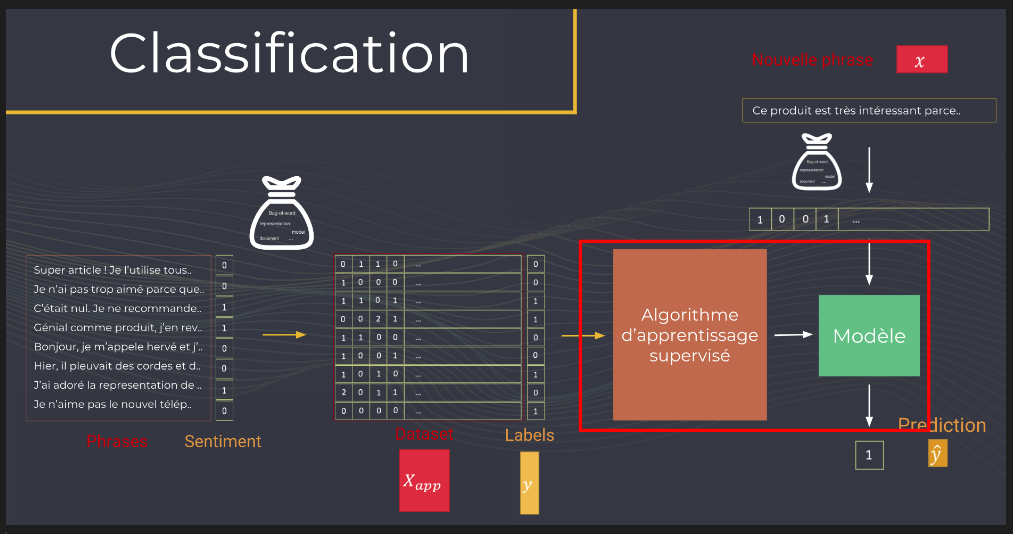

In [53]:
from IPython.display import Image
Image("./Images/Etape2.png", width=1000)

### Prédiction sur le jeu de test

In [103]:
df_test = pd.read_csv('./data/sentiment-test-mini.csv',sep=',',header=None,names=['label','text'],keep_default_na=False)

In [104]:
print(df_test.dtypes)  # Vérifie les types des colonnes
print(df_test['label'].unique())  # Affiche les valeurs uniques des labels
# Convertir les étiquettes en entiers
df_test['label'] = df_test['label'].astype(int)

label     int64
text     object
dtype: object
[0 4]


#### Transformations des données de test

In [105]:
X_test_counts = count_vect.transform(df_test.text)

#### Prédictions

In [106]:
predictions = clf.predict(X_test_counts)

In [107]:
print(predictions.dtype)  # Vérifie le type des prédictions
print(predictions)  # Affiche les prédictions

object
['0' '4' '4' '0' '4' '4' '0' '4' '0' '4' '0' '4' '4' '0' '4' '4' '0' '0'
 '4' '0' '0' '0']


In [108]:
from sklearn.metrics import accuracy_score

In [109]:
# Convertir les prédictions en entiers
predictions = predictions.astype(int)

# Calculer la précision
accuracy = accuracy_score(predictions, df_test['label'])
print("Précision du modèle :", accuracy)


Précision du modèle : 0.8636363636363636


In [110]:
# Convertir les labels en chaînes de caractères
df_test['label'] = df_test['label'].astype(str)

# Calculer le score
score = clf.score(X_test_counts, df_test['label'])
print("Score du modèle :", score)


Score du modèle : 0.8636363636363636


In [111]:
# Phrase à tester
phrase = "je ne t'aime pas "

# Transformer la phrase en vecteur
phrase_vector = count_vect.transform([phrase])

# Prédire le label
predicted_label = clf.predict(phrase_vector)

# Afficher le résultat
print("Phrase :", phrase)
print("Label prédit :", predicted_label[0])


Phrase : je ne t'aime pas 
Label prédit : 0
